In [1]:
# Decision Tree can be used to implement both regression and classification problems.

In [2]:
from IPython.display import Image

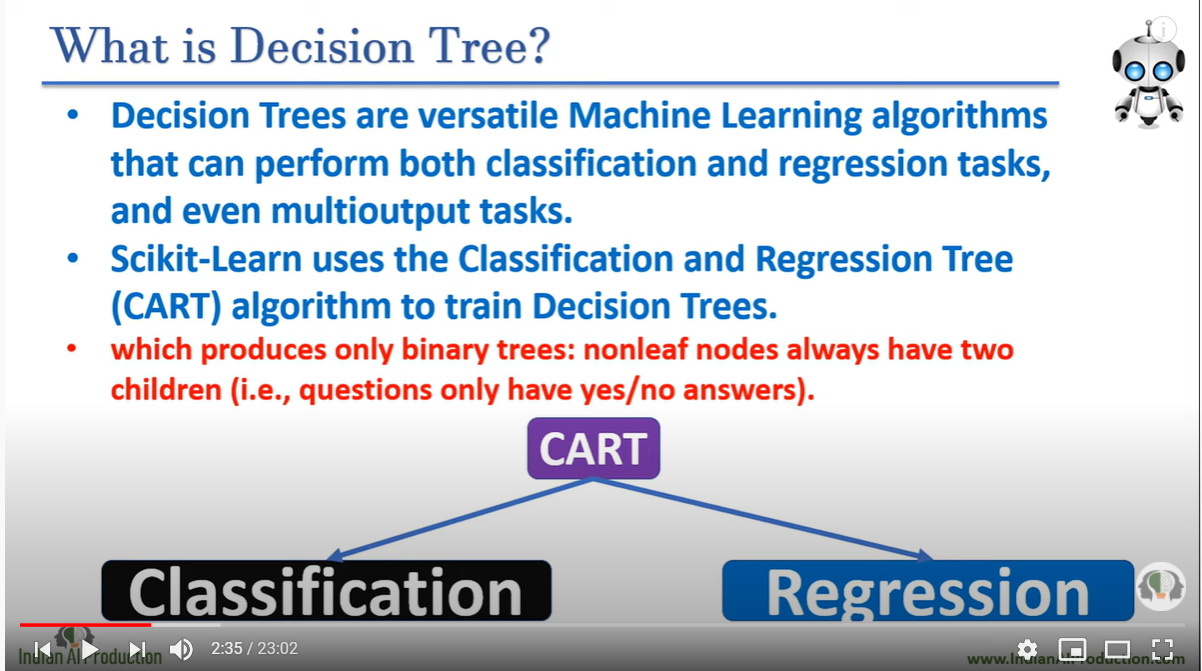

In [3]:
Image(filename="decision_tree.png",width=500)

In [4]:
# CART algorithm: Two children for each non-leaf node
# ID3 algorithm: Multiple children for each non-leaf node

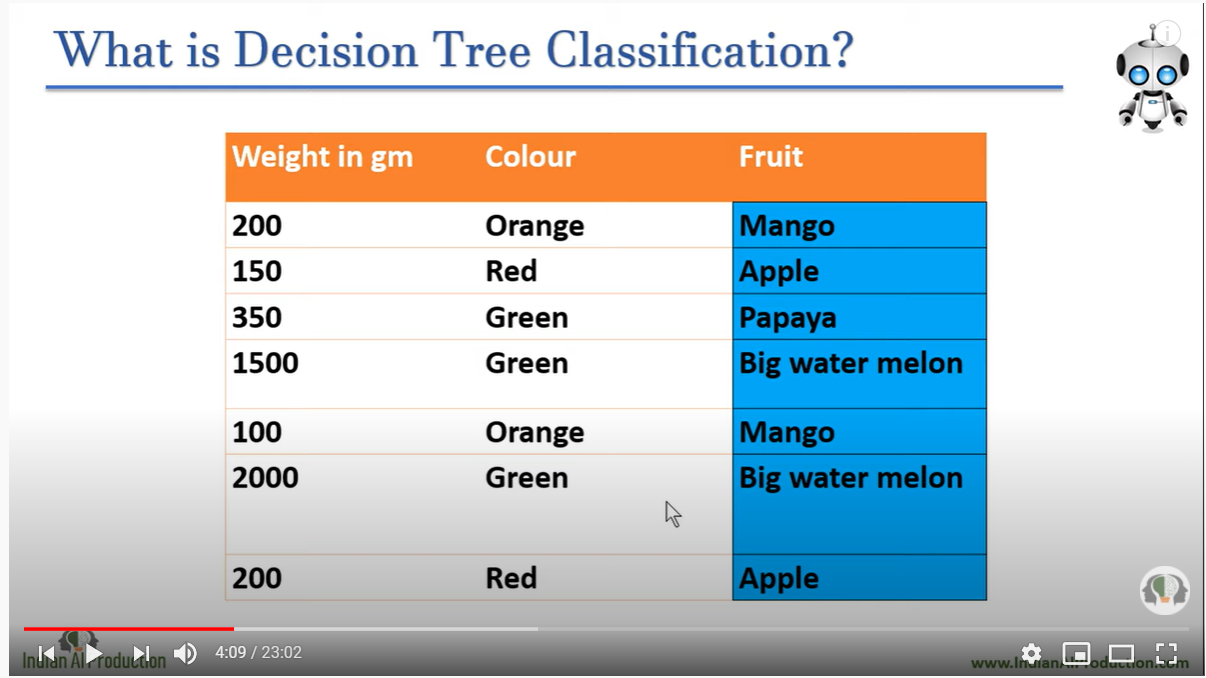

In [5]:
# Consider a dataset:
Image(filename="dataset.png",width=500)

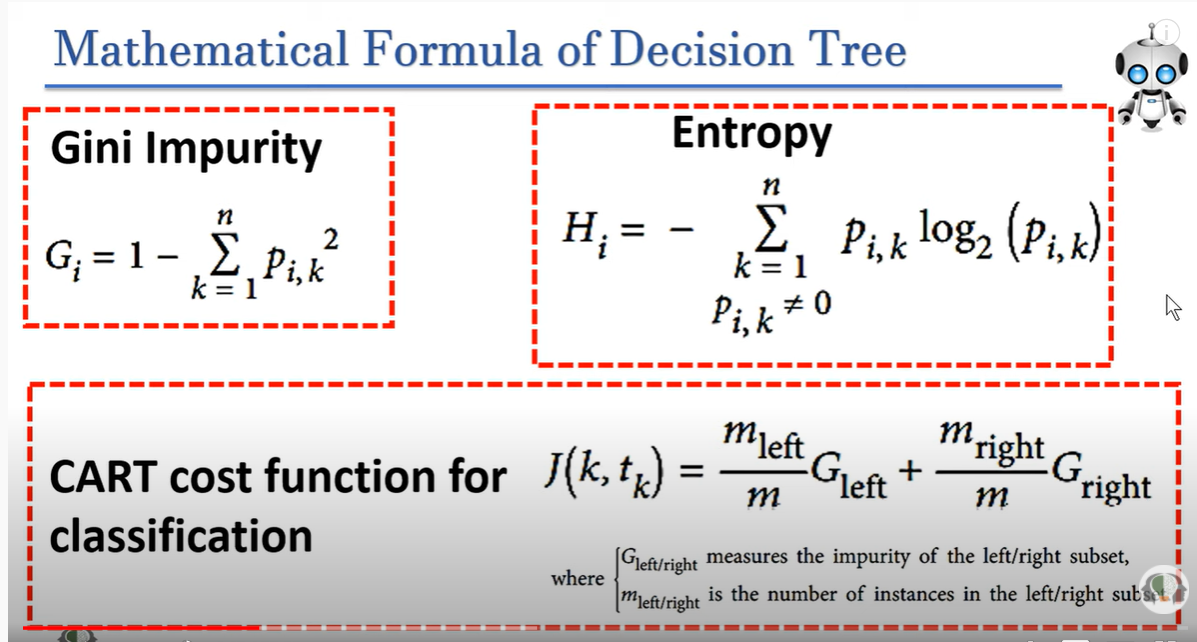

In [6]:
# To detect the root node and make the decision tree, we apply formulas:
Image(filename="formulae.png",width=700)

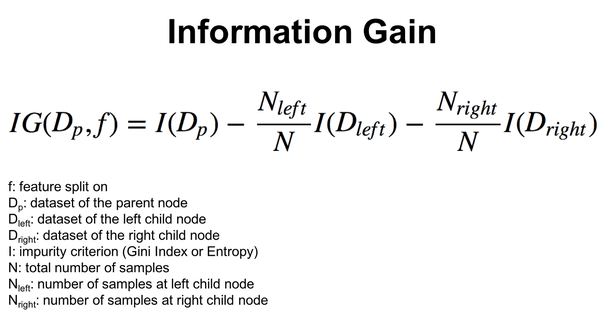

In [7]:
# First, we need to create a root node. To create a root node, we can use Gini Impurity or Entropy. We calculate the entropy
# of both independent and target variables. Then we find the "information gain" of all the attributes/ independent variables.
# The attribute having the largest information gain becomes the root node. Then we split our dataset. We repeat the above
# procedure until we draw the complete decision tree i.e., use all our attributes in our decision tree.
Image(filename="information_gain.png",width=500)

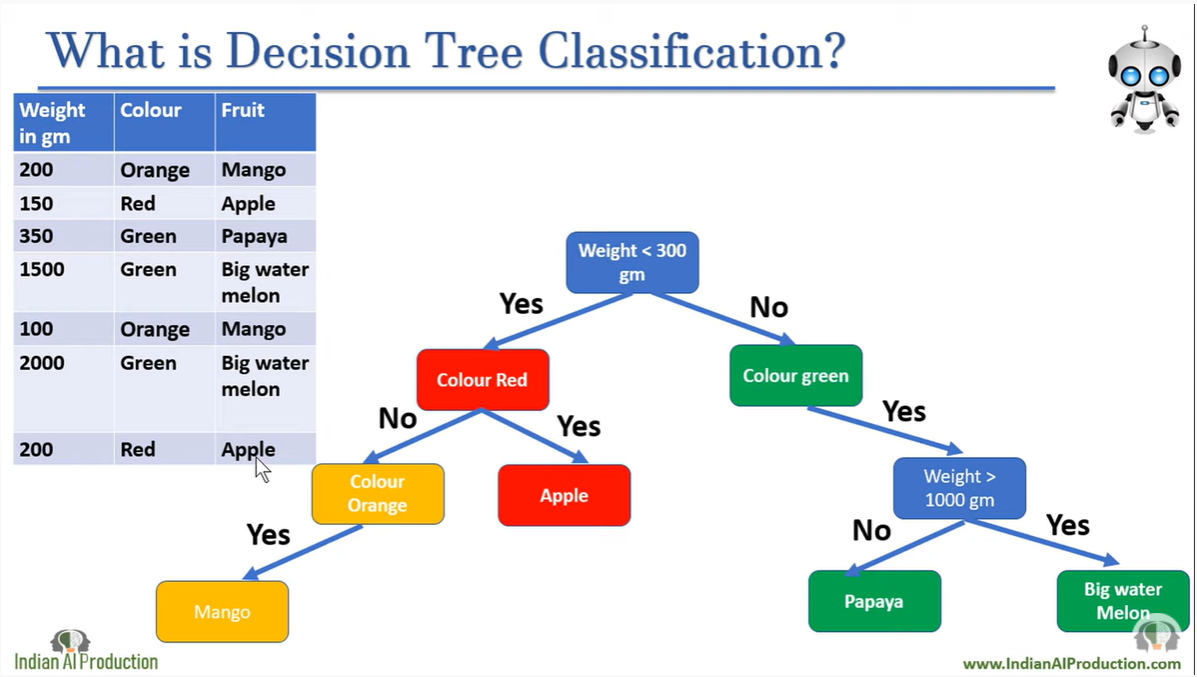

In [8]:
# Now we applied the required mathematics and drew the decision tree for the above dataset.
Image(filename="tree.png",width=700)

In [9]:
# Now our model is trained and can be used for testing.

In [10]:
# Note that decision tree algorithm is a weak algorithm. So the introduction of Random Forests, XGBoost and Bagging algorithms
# came into picture where they use multiple decision trees to make their model stronger.

In [11]:
# Decision tree splits the data and hence the complexity of the code increases.

# CART

In [12]:
import pandas as pd
import numpy as np

In [13]:
from sklearn.datasets import load_breast_cancer

In [14]:
data=load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [15]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [17]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [18]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [19]:
# We create a dataframe out of this data

In [20]:
df=pd.DataFrame(data=data.data,columns=np.array(data.feature_names))
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [21]:
df["target"]=data.target

In [22]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [23]:
# Now we split the dataset into independent and dependent variables.
X=df.drop(columns="target")
y=df["target"]

In [24]:
# Now we split them into training and test data
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2020)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test

((455, 30),
 (114, 30),
 (455,),
 236    0
 106    1
 284    1
 262    0
 356    1
       ..
 370    0
 167    0
 108    0
 131    0
 336    1
 Name: target, Length: 114, dtype: int32)

In [27]:
# Now we are training our model
from sklearn.tree import DecisionTreeClassifier

In [28]:
classifier=DecisionTreeClassifier(criterion='gini')

In [29]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
classifier.score(X_test,y_test)

0.956140350877193

In [31]:
# You can see that our score is high and we can deploy our model. Lets check what happens if we take our criterion as entropy.

In [32]:
classifier_ent=DecisionTreeClassifier(criterion='entropy')

In [33]:
classifier_ent.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
classifier_ent.score(X_test,y_test)

0.9385964912280702

In [35]:
# You can see that the score is reduced and hence the first model can be deployed.

In [36]:
# Feature scaling is not necessary in decision tree because we do not draw graphs here. We just check the parameters and
# see that whether our test data belongs to that group or not.

In [37]:
# To verify this:

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
std_scaler=StandardScaler()

In [40]:
std_scaler.fit(X_train)

StandardScaler()

In [41]:
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

In [45]:
classifier_std=DecisionTreeClassifier(criterion="gini")
classifier_std.fit(X_train_std, y_train)
classifier_std.score(X_test_std,y_test)

0.9473684210526315

In [46]:
# You can see that feature scaling the data reduced the accuracy of the decision tree.

In [47]:
# Now we predict using the model:

In [49]:
patient1 = [17.99,
 10.38,
 122.8,
 1001.0,
 0.1184,
 0.2776,
 0.3001,
 0.1471,
 0.2419,
 0.07871,
 1.095,
 0.9053,
 8.589,
 153.4,
 0.006399,
 0.04904,
 0.05373,
 0.01587,
 0.03003,
 0.006193,
 25.38,
 17.33,
 184.6,
 2019.0,
 0.1622,
 0.6656,
 0.7119,
 0.2654,
 0.4601,
 0.1189]

In [53]:
classifier.predict([patient1])[0]

0

In [54]:
# Since the value is zero, the patient is suffering from cancer.

In [56]:
data.target_names[classifier.predict([patient1])[0]]

'malignant'

In [57]:
if classifier.predict([patient1])[0]==0:
    print("Cancer")
else:
    print("Safe")

Cancer


In [58]:
# You can create functions for these to make the code better.